# Tratamento de dados e limpeza de dados para montar posteriormente um modelo de Machine Learning para saber os dias que poderá haver jogo.

#### Dominio da base de dados ("Regras de negócio da base"):
    - Aparência: sol, nublado, chuva.
    - Temperatura: -130F ~ 130F ("A temperatura da base é representada em fahrenheit")
    - Umidade: 0 ~ 100
    - Jogar: sim/nao (Posteriormente será o nosso target do modelo de aprendizagem de máquina)

In [1]:
import pandas as pd
import seaborn as sns
import statistics as sts

In [2]:
# Importando a base de dados para meu dataframe base.
base = pd.read_csv('tempo.csv', sep = ';')
# Vizualizando a base de dados
base.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [3]:
# conhecendo melhor a base.
base.tail()

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75,200.0,NaN,sim
10,sol,75,70.0,VERDADEIRO,sim
11,nublado,72,90.0,VERDADEIRO,sim
12,nublado,81,75.0,FALSO,sim
13,chuva,71,91.0,VERDADEIRO,nao


In [5]:
base.describe()

,Temperatura,Umidade
count,14.000000,13.000000
mean,155.571429,89.769231
std,306.433759,34.540203
min,64.000000,65.000000
25%,69.250000,70.000000
50%,73.500000,85.000000
75%,80.750000,90.000000
max,1220.000000,200.000000


In [6]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Aparencia    14 non-null     object 
 1   Temperatura  14 non-null     int64  
 2   Umidade      13 non-null     float64
 3   Vento        13 non-null     object 
 4   Jogar        14 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 688.0+ bytes


## Verificamos que temos 1 valor nulo na coluna Umidade e 1 valor nulo na coluna Vento.

###   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Aparencia    14 non-null     object<br> 
 1   Temperatura  14 non-null     int64 <br>
 **2   Umidade      13 non-null     float64 <br>
 3   Vento        13 non-null     object** <br>
 4   Jogar        14 non-null     object <br>

## Explorando dados de cada coluna:

In [12]:
# 1ª coluna é 'Aparencia' que são dados de valor categóricos: 
aparencia = base.groupby(['Aparencia']).size()
aparencia

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

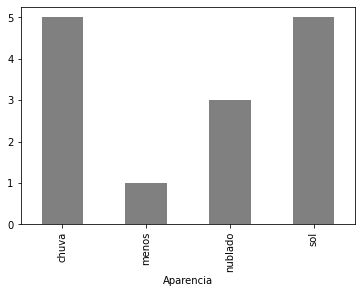

In [14]:
# Análisando gráficamente
aparencia.plot.bar(color='gray');

**Já vemos que temos um valor que não se encaixa no domínio da base de dados que é "menos"**

In [11]:
# 2ª coluna é "Temperatura" que são dados de valor numérico:
temperatura = base['Temperatura'].describe()
temperatura

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

**Vemos que o valor máximo '1220' foge do valor do domínio de temperatura, analisando vemos que o valor da média é o dobro do valor da mediana ou seja os dados podem não estar muito bem distribuídos**

Text(0.5, 1.0, 'Temperatura')

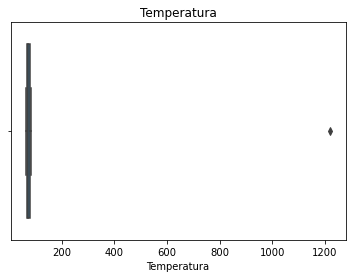

In [22]:
# Análisando gráficamente
sns.boxplot(x=base['Temperatura']).set_title("Temperatura")
# Vemos que Boxplot nos mostra apenas um valor outlier

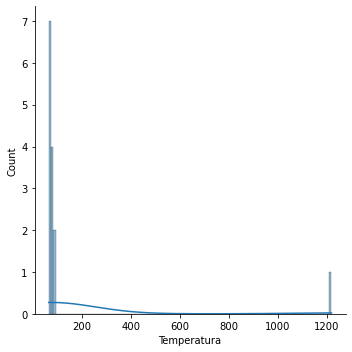

In [47]:
# Usando um histograma para ver melhor os dados:
sns.displot(base, x="Temperatura", kde=True);
# Vemos que o valor outlier atrapalha a vizualização dos valores no gráfico e provavelmente temos apenas um valor de 1220.
# Então provavelmente esse valor de 1220 é tão grande que pode estar influenciando o valor da média.

In [38]:
# 3ª coluna é "Umidade" que são dados de valor numérico:
umidade = base['Umidade'].describe()
umidade

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

**Vemos que apresenta o mesmo problema da coluna 'Temperatura'.
Temos o valor máximo de 200 sendo que pelo domínio da base o valor máximo de Umidade é de 100.
Além de termos visto que essa coluna apresenta um valor nulo**

In [42]:
# confirmando quantos valores nulos a coluna apresenta.
base['Umidade'].isnull().sum()

1

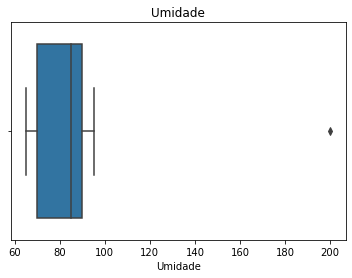

In [52]:
# Análisando Gráficamente
sns.boxplot(x=base['Umidade']).set_title("Umidade");
# Nesse caso podemos ver que há apenas um outliers e ele não chega 
# a deformar nosso gráfico igual o que acontece com a coluna Temperatura

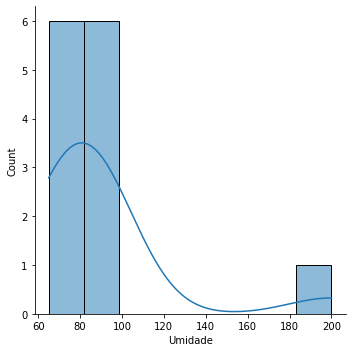

In [54]:
sns.displot(base, x="Umidade", kde=True);
# Confirmamos que a apenas 1 valor outlier.

In [57]:
# 4ª coluna é "Vento" que são dados de valor categóricos
vento = base.groupby(['Vento']).size()
vento

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

**Vemos que essa coluna é de valor categórico e com apenas 2 categorias verdadeiro e falso. E também lembramos que é uma coluna com 1 valor nulo**

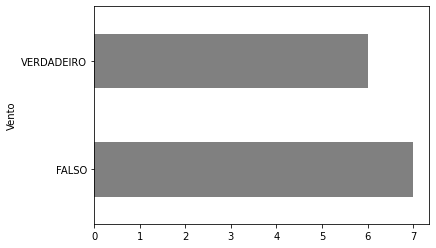

In [59]:
vento.plot.barh(color='gray');

### A última coluna seria o target do nosso modelo então não iremos mexer nela no momento.
# Agora iremos tratar dos dados de cada coluna iniciando pela coluna 'Aparencia'

In [60]:
# lembrando como dos dados:
aparencia

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

In [63]:
# Como é uma coluna de dados categóricos iremos subistituir o valor 'menos' 
# pela moda da coluna que seriam os valores 'chuva' e 'sol'.
# Vamos analisar mais a fundo para decidir qual valor iremos substituir.
base[base['Aparencia'] == 'menos']

,Aparencia,Temperatura,Umidade,Vento,Jogar
6,menos,64,65.0,VERDADEIRO,sim


**Como vemos que na coluna "Jogar" apresenta sim, então entre sol e chuva é mais provavel que a aparencia seja sol.**

In [66]:
# Substituindo valor "menos" pelo valor "sol".
base.loc[base['Aparencia'] == 'menos', 'Aparencia'] = 'sol'
aparencia = base.groupby(['Aparencia']).size()
aparencia

Aparencia
chuva      5
nublado    3
sol        6
dtype: int64

In [67]:
# Trantando 2ª coluna 'Temperatura'
# Relembrando os dados
temperatura

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

Text(0.5, 1.0, 'Temperatura')

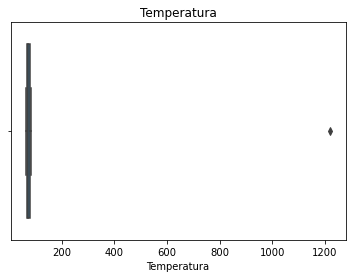

In [68]:
sns.boxplot(x=base['Temperatura']).set_title("Temperatura")

In [69]:
base['Temperatura'].isnull().sum()

0

In [70]:
base.loc[(base['Temperatura'] < - 130) | (base['Temperatura'] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


In [72]:
# Confirmamos que temos apenas um valor para corrigir.
# E como é uma coluna de valor numérico vamos corrigir substituindo pela mediana.
mediana_temp = sts.median(base['Temperatura'])
mediana_temp

73.5

In [73]:
# Substituindo o valor pela mediana.
base.loc[(base['Temperatura'] < - 130) | (base['Temperatura'] > 130), 'Temperatura'] = mediana_temp

In [74]:
# Confirmando a correção dos dados e a subtituição:
base.loc[(base['Temperatura'] < - 130) | (base['Temperatura'] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [75]:
# Trantando 3ª coluna 'Umidade'
# Relembrando os dados
umidade

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

In [78]:
# Vendos quantos valores estão fora do domínio
base.loc[(base['Umidade'] < 0) | (base['Umidade'] > 100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75.0,200.0,NaN,sim


In [79]:
base['Umidade'].isnull().sum()

1

In [81]:
# Como é um valor numérico vamos preencher o valor nulo e substituir o valor fora do domínio pela mediana dos valores da coluna.
mediana_umid = sts.median(base['Umidade'])
mediana_umid

85.5

In [84]:
# Preenchendo o valor nulo primeiro
base['Umidade'].fillna(mediana_umid, inplace=True)

In [83]:
# Verificando valor nulo
base['Umidade'].isnull().sum()

0

In [86]:
# Substituindo o valor fora de dominio
base.loc[(base['Umidade'] < 0) | (base['Umidade'] > 100), 'Umidade'] = mediana_umid

In [87]:
# Verificando valor fora de domínio
base.loc[(base['Umidade'] < 0) | (base['Umidade'] > 100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [88]:
# Trantando 4ª coluna 'Vento'
# Lembrando dos dados
vento

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [89]:
base['Vento'].isnull().sum()

1

In [90]:
# Não tem valor fora do domínio somente 1 valor nulo
# Como é uma coluna com valor categórico iremos preencher os valores nulos pela moda da coluna que no caso é 'FALSO'
base['Vento'].fillna('Falso', inplace=True)

In [92]:
# Verificando valores nulos.
base['Vento'].isnull().sum()

0